<a href="https://colab.research.google.com/github/TanyaYadav/Deep-Learning-Projects/blob/main/Google_Stock_Price_Prediction_(using_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Google Stock Price Prediction Using LSTM***

###***Importing required libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

###***Reading our training data***

In [ ]:
dataset_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])



*   Here we are reading the input train data.

*   We are just taking the first column here which is the ‘open’ column.

*   Then we are initializing the MinMaxScaler to scale our data between 0 and 1.
*   After that, we initialized two arrays X_train and y_train.


*   The first entry in the X_train would be an array of the first 60 open stock prices and the first entry in the y_train will be the 61st value of open stock price. It means that we want our model to predict the 61st value of stock price when we provide it with the previous 60 values.


*   In this way, we keep on building our X_train and y_train.



###***Getting our training data in shape***

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)



*   Here we are converting our lists to arrays.

*   In the 2nd step, we are adding a dummy dimension in the end because Keras models require the data in this format only.


###***Creating the Stock Price Prediction Model***

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2



*   Our Sequential model consists of 4 LSTM layers with 50 units each.

*   After these LSTM layers, we have a Dense layer.
*   We are using Adam optimizer here and the loss we are using is Mean Squared Error.






###***Training the Stock Price Prediction Model***

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 120ms/step - loss: 0.0390
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0042
Epoch 13/100



*   Training our model for 100 epochs.

*   The batch size which we have taken is 32.





###***Reading the test data***

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

###***Getting the Stock Price Predictions on the test data***

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



*   Concatenating the test ‘Open’ column with the train ‘Open’ column row wise.

*   The step we did above was just to take the last 60 values from the train data and also adding that to test data.

*   Then we are reshaping it to have just one column and as many rows.
*   Scaling it using MinMaxScaler.


*   Then we are creating the test data as we did for train data.


*   And finally, we are making predictions.



####***NOTE – What we are doing above is we are first taking the last 60 open values from the train and making predictions from it for the 61st value. Then what we will do is we will drop the 0th open value and now our input array will be 1st open value to 61st open value (60 values) and we will predict 62nd open value and like this, we will keep on predicting the next value and take that for predicting next values.***

###***Plotting the predictions and real data***

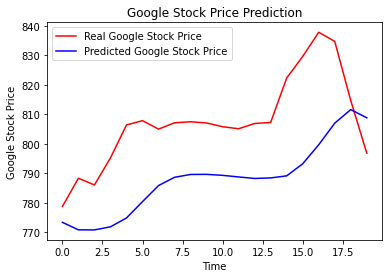

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



*   Here we are simply plotting our predictions in the blue curve.
*   The red curve represents its true value, which means what it should be exactly.

*   We can see that our model is not that perfect but still it is capable of catching the spikes (where the curve starts to go up).




